<a href="https://colab.research.google.com/github/min207/ESAA/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (11.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv("movies_train.csv")
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


# 데이터 전처리

In [ ]:
pd.isna(df['num_staff']).sum()

0

In [ ]:
pd.isna(df['num_actor']).sum()

0

In [ ]:
pd.isna(df['box_off_num']).sum()

0

In [4]:
df['dir_prev_bfnum'].fillna(0, inplace=True)

In [5]:
df['release_time']=pd.to_datetime(df['release_time'])

# EDA

- 배급사 별 장르
- 배급사 별 스텝 수
- 개봉일 별 관객 수
- 월별 개봉영화 수

----

- title : 영화의 제목
- distributor : 배급사
- genre : 장르
- release_time : 개봉일
- time : 상영시간(분)
- screening_rat : 상영등급
- director : 감독이름
- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
- num_staff : 스텝수
- num_actor : 주연배우수
- box_off_num : 관객수



### **< 배급사 별 장르 >**

In [ ]:
# 각 배급사 별 제작 영화 개수 확인 > 대부분 10개 이하의 영화를 제작한 배급사임을 확인할 수 있다. 
df['distributor'].value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

In [6]:
# 11개 이상의 영화를 제작한 배급사만 추출하여 db라는 변수로 저장
db = df['distributor'].value_counts()[df['distributor'].value_counts()>10]
db

CJ 엔터테인먼트    54
롯데엔터테인먼트     52
(주)NEW       30
(주)마운틴픽쳐스    29
(주)쇼박스       26
인디스토리        26
골든타이드픽처스     15
(주) 케이알씨지    14
Name: distributor, dtype: int64

In [ ]:
# 배급사, 장르로 groupby하여 각 배급사의 장르별 영화 수를 db_genre라는 변수로 저장
db_genre = df.groupby(['distributor','genre'])['title'].count().reset_index()
db_genre.columns = ['distributor', 'genre', 'num']

In [ ]:
db_genre

,distributor,genre,num
0,(주) 브릿지웍스,멜로/로맨스,1
1,(주) 브릿지웍스,코미디,2
2,(주) 액티버스엔터테인먼트,드라마,1
3,(주) 액티버스엔터테인먼트,멜로/로맨스,1
4,(주) 영화사조제,SF,1
...,...,...,...
303,한국YWCA연합회,다큐멘터리,1
304,홀리가든,다큐멘터리,1
305,홀리가든,드라마,3
306,화앤담이엔티,드라마,1


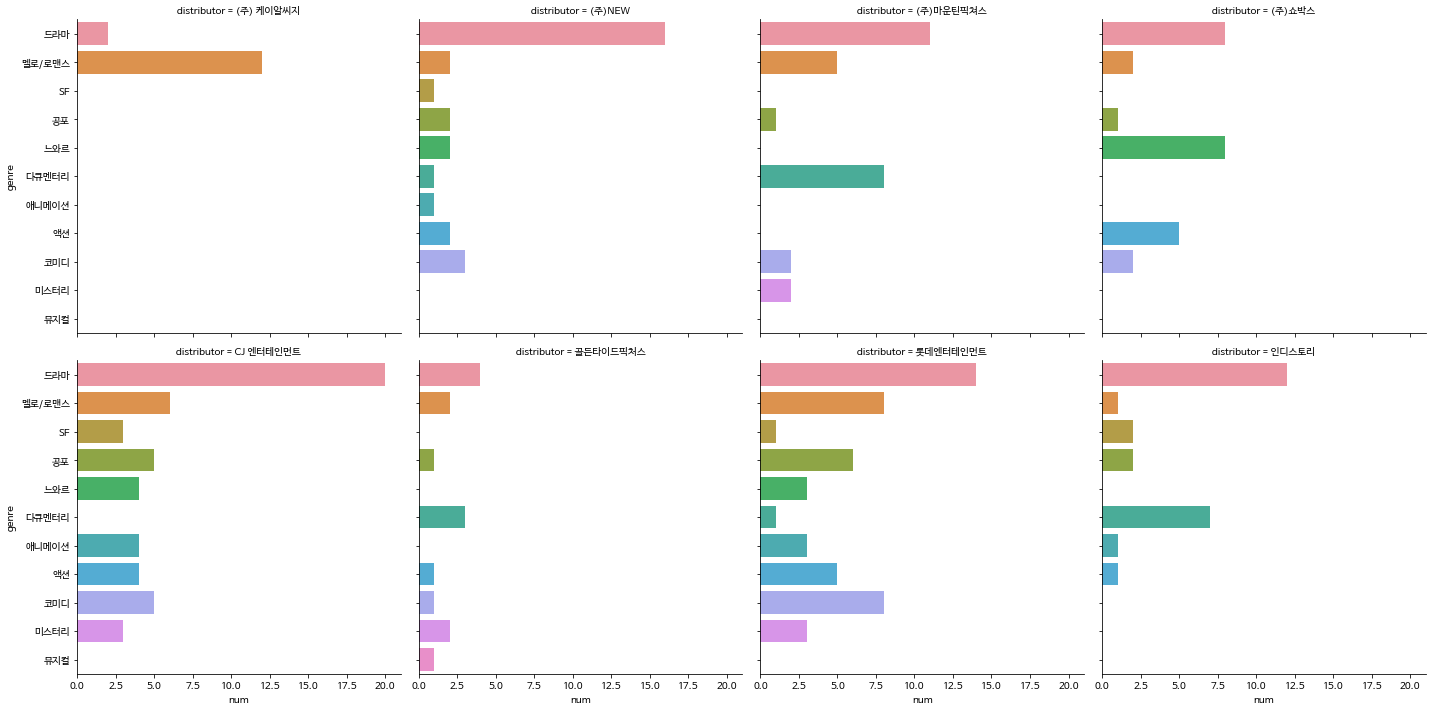

In [ ]:
# db_genre(전체 배급사 포함)에서 db에 해당하는 데이터 목록만 추출하여 df_distributor_genre라는 변수로 저장
df_distributor_genre = db_genre[db_genre['distributor'].isin(db.index)]

# 각 배급사의 장르별 영화 수에 대한 바 그래프 생성
axes = sns.catplot(data=df_distributor_genre, x='num', y='genre', kind='bar', col='distributor', col_wrap=4)

- 결론
  + 드라마 장르는 대부분의 배급사에서 제작되는 영화 장르임을 확인할 수 있다.
  + CJ 엔터테이먼트와 NEW 배급사는 대부분의 장르의 영화를 제작한다.
  + 상대적으로 마운틴픽쳐스, 골든타이드픽처스, 인디스토리는 다큐멘터리 영화를 주로 제작하는 배급사라는 것을 알 수 있다.
  + 롯데엔터테인먼트는 드라마 장르를 제외하면 멜로/로맨스, 공포, 코미디 장르의 영화를 주로 제작한다.
  + 쇼박스는 느와르, 액션 장르를 주로 제작한다.


### **< 배급사 별 스텝 수 >**

In [ ]:
# 배급사 별 평균 스텝수를 구한 후 staff_mean 변수에 저장
staff_mean = df[['distributor','num_staff']].groupby('distributor').mean().sort_values('num_staff',ascending=False)

# 대부분 평균 100명 이하의 스텝이 영화 제작에 참여 > 평균 300명 이상의 스텝을 고용한 배급사만 db_staff라는 변수에 저장
db_staff = staff_mean[staff_mean['num_staff']>=300]
db_staff['num_staff']

distributor
주머니필름              477.000000
(주)아이필름코퍼레이션       458.000000
스튜디오 블루            436.000000
SK텔레콤(주)           410.000000
KT                 364.000000
(주)쇼박스             360.384615
CGV 아트하우스          342.500000
전주국제영화제            336.000000
CJ E&M Pictures    335.000000
시너지                333.100000
(주)JK필름            326.000000
전망좋은영화사            318.000000
CJ 엔터테인먼트          313.629630
롯데엔터테인먼트           312.000000
Name: num_staff, dtype: float64

In [ ]:
# df에서 db_staff에 포함되는 배급사에 대한 데이터만 추출 후 df_distributor_staff에 저장
df_distributor_staff = df[df['distributor'].isin(db_staff.index)]
df_distributor_staff

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211
7,회사원,(주)쇼박스,액션,2012-10-11,96,청소년 관람불가,임상윤,739522.00,3,342,2,1110523
...,...,...,...,...,...,...,...,...,...,...,...,...
589,상의원,(주)쇼박스,드라마,2014-12-24,127,15세 관람가,이원석,0.00,0,456,5,790370
590,짐승의 끝,CJ 엔터테인먼트,미스터리,2011-03-17,114,청소년 관람불가,조성희,0.00,0,92,2,1250
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.00,0,431,4,2192525


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

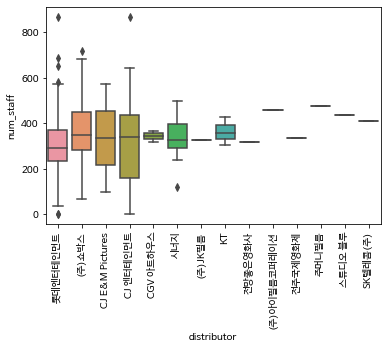

In [ ]:
# 배급사 별 스텝 수에 대한 박스 그래프 생성
axes = sns.boxplot(x=df_distributor_staff.distributor, y=df_distributor_staff.num_staff)
plt.xticks(rotation=90)

- 그래프 해석
  + 영화 제작 수가 11개 이상인 큰 제작자에서 주로 많은 수의 스텝을 고용한다는 것을 확인 가능
  + 많은 수의 스텝이 영화 제작에 참여하였으나 제작한 영화의 수가 1개 혹은 몹시 적어서 박스 그래프가 그려지지 않는 현상이 발생
  + 위의 배급사 별 장르에서 구한 제작 영화가 11개 이상인 배급사 목록으로 박스 그래프를 다시 생성
  + 이상치로 800명 이상의 스텝이 참여한 영화가 존재함을 알 수 있다.

In [ ]:
df.sort_values('num_staff', ascending=False)[['title','distributor','num_staff']].head(20)

,title,distributor,num_staff
372,국제시장,CJ 엔터테인먼트,869
505,해적: 바다로 간 산적,롯데엔터테인먼트,868
201,강남 1970,(주)쇼박스,719
320,최종병기 활,롯데엔터테인먼트,687
477,황해,(주)쇼박스,683
124,역린,롯데엔터테인먼트,650
310,순수의 시대,CJ 엔터테인먼트,642
498,암살,(주)쇼박스,628
487,대호,(주)NEW,612
48,빅매치,(주)NEW,600


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

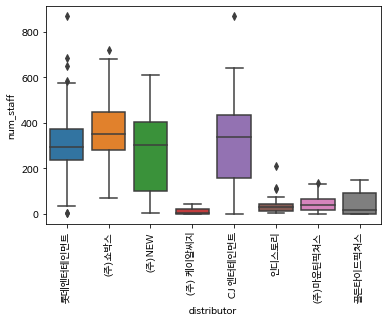

In [ ]:
# 영화 제작 수가 11개 이상인 배급사의 데이터만 추출 후 df_distributor_staff_2에 저장 후 박스 그래프 생성
df_distributor_staff_2 = df[df['distributor'].isin(db.index)]

axes = sns.boxplot(x=df_distributor_staff_2.distributor, y=df_distributor_staff_2.num_staff)
plt.xticks(rotation=90)

- 그래프 해석
  + 롯데엔터테인먼트, 쇼박스, NEW, CJ엔터테인먼트는 많은 수의 스텝 수를 영화 제작에 참여시키는 배급사임을 확인할 수 있다.
  + 스텝 수가 적은 배급사를 살펴보면, 케이알씨지를 제외하고는 다큐멘터리를 주로 제작하는 배급사이다.
  + 모든 배급사가 드라마 장르의 영화를 많이 제작하여 평균에 영향을 미쳤을 수 있으므로 드라마 장르를 제외하여 다시 박스 그래프를 생성해 다큐멘터리 장르 영화 제작에는 적은 스텝 수가 들어간다는 가설을 확인한다.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

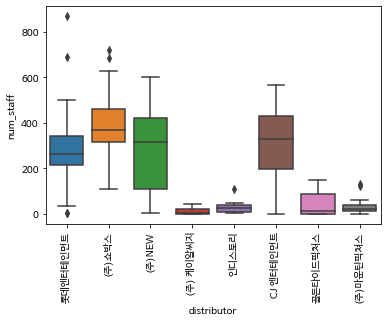

In [ ]:
# 위의 데이터에서 장르가 드라마인 영화 제외 후 그래프 생성
df_distributor_staff_3 = df_distributor_staff_2[df_distributor_staff_2['genre']!='드라마']
axes = sns.boxplot(x=df_distributor_staff_3.distributor, y=df_distributor_staff_3.num_staff)
plt.xticks(rotation=90)

In [ ]:
# 다큐멘터리 장르 영화의 스텝 수 확인
df[df['genre']=="다큐멘터리"].sort_values('num_staff',ascending=False)[['title','distributor','genre','num_staff']]

,title,distributor,genre,num_staff
197,만신,(주)엣나인필름,다큐멘터리,227
557,목숨,필라멘트 픽쳐스,다큐멘터리,139
255,누구에게나 찬란한,CGV아트하우스,다큐멘터리,125
469,그 사람 추기경,(주)프레인글로벌,다큐멘터리,54
228,회복,스토리셋,다큐멘터리,54
...,...,...,...,...
125,하쿠나 마타타 - 지라니 이야기,이모션 픽처스,다큐멘터리,0
394,인피니트 콘서트 세컨드 인베이전 에볼루션 더 무비 3D,골든타이드픽처스,다큐멘터리,0
290,훈장과 악동들,어뮤즈,다큐멘터리,0
173,법정스님의 의자,(주)키노아이,다큐멘터리,0


- 결론
  + 제작 영화 개수가 많은 큰 배급사에서는 많은 수의 스텝을 영화 제작에 참여시킨다.
  + 다큐멘터리 장르의 영화 제작에는 적은 수의 스텝이 참여한다는 것을 알 수 있다.

In [ ]:
#staff_mean[(staff_mean['num_staff']<300)&(staff_mean['num_staff']>=200)]
#staff_mean[(staff_mean['num_staff']<200)&(staff_mean['num_staff']>=100)]
#staff_mean[staff_mean['num_staff']<100]

###**< 개봉일 별 관객 수 >**

In [8]:
# release_time 변수에서 날짜와 월을 추출하여 각각 day, month 칼럼 생성
df['day'] = df['release_time'].dt.day
df['month'] = df['release_time'].dt.month

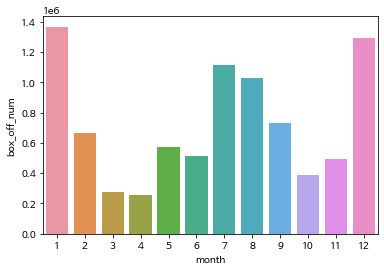

In [ ]:
# 월별 관객 수에 대한 바 그래프 생성
month_box_off_num = df[['month','box_off_num']].groupby('month').mean().sort_values('box_off_num',ascending=False)
axes = sns.barplot(x=month_box_off_num.index, y=month_box_off_num.box_off_num)

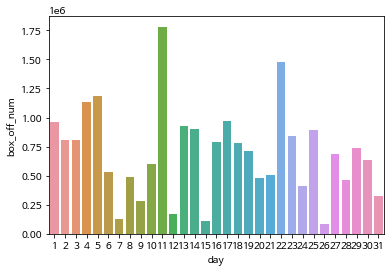

In [ ]:
# 일별 관객 수에 대한 바 그래프 생성
day_box_off_num = df[['day','box_off_num']].groupby('day').mean().sort_values('box_off_num',ascending=False)
axes = sns.barplot(x=day_box_off_num.index, y=day_box_off_num.box_off_num)

- 결론
  + 1월, 12월 즉 연말, 연초에 관객수가 상대적으로 많다는 것을 알 수 있다.
  + 일별 관객 수 그래프에서는 특별한 규칙성을 찾을 수 없는 것으로 보아 날짜와(월초, 월말 등) 관객 수는 큰 연관이 없음을 알 수 있다.

### **<계절별 장르 관객 수>**
- 월별 장르와 월별 개봉영화 수에 대한 그래프에서 유의미한 관계가 발견되지 않아 계절 별 장르에 따른 관객 수에 대한 그래프를 그려보기로 결정

In [40]:
# 계절에 대한 칼럼 추가

def season(x):
  if ((x>=3) & (x<=5)):
    return 'spring'
  elif ((x>=6) & (x<=8)):
    return 'summer'
  elif ((x>=9) & (x<=11)):
    return 'fall'
  else:
    return 'winter'

df['season'] = df['month'].apply(season)
df.head(10)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,day,month,season
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,22,11,fall
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,19,11,fall
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,5,6,summer
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,12,7,summer
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,4,11,fall
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211,25,10,fall
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,0.00,0,32,5,53526,23,5,spring
7,회사원,(주)쇼박스,액션,2012-10-11,96,청소년 관람불가,임상윤,739522.00,3,342,2,1110523,11,10,fall
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,0.00,0,3,5,4778,18,9,fall
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,0.00,0,138,3,868,15,3,spring


In [33]:
# 계절 별 장르 영화의 관객 수

genre_num = df.groupby(['season', 'genre'])['box_off_num'].mean().sort_values(ascending = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

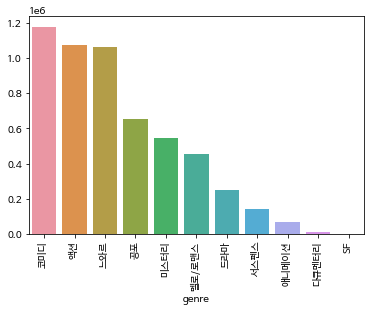

In [36]:
# 봄: 장르 별 관객 수

axes1 = sns.barplot(genre_num['spring'].index, genre_num['spring'].values)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

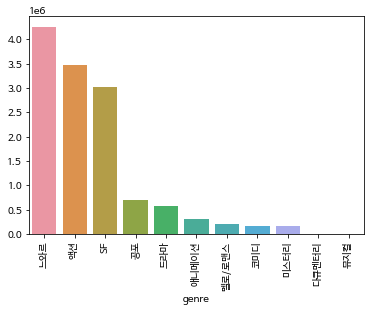

In [37]:
# 여름: 장르 별 관객 수

axes2 = sns.barplot(genre_num['summer'].index, genre_num['summer'].values)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

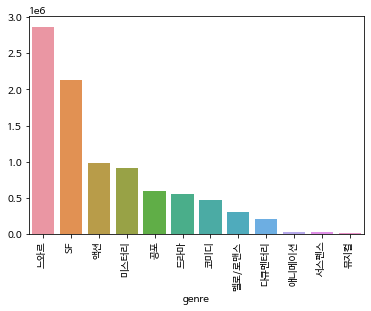

In [38]:
# 가을: 장르 별 관객 수

axes3 = sns.barplot(genre_num['fall'].index, genre_num['fall'].values)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

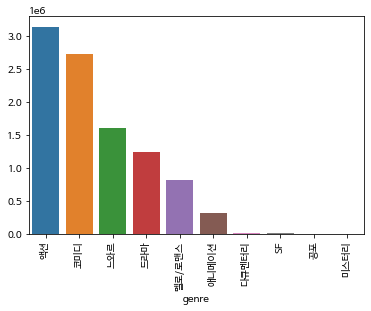

In [39]:
# 겨울: 장르 별 관객 수

axes4 = sns.barplot(genre_num['winter'].index, genre_num['winter'].values)
plt.xticks(rotation=90)

- 결론
  + 봄에는 코미디, 여름과 가을에는 느와르, 겨울에는 액션 영화의 관객 수가 가장 많다.
  + 봄과 겨울에는 여름과 가을에 비해 SF 장르의 관객 수가 현저히 적다.(영화 수 자체도 적을 것으로 예상)